In [58]:

import pandas as pd
import numpy as np


import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from wordcloud import WordCloud



In [59]:
orignal_data = pd.read_csv("credit_risk_dataset.csv")
data = pd.read_csv("credit_risk_dataset.csv")

In [60]:
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [61]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [62]:
data.loan_status.value_counts()

loan_status
0    25473
1     7108
Name: count, dtype: int64

In [63]:
data_corr = data

In [64]:
data_corr = data_corr.drop(['loan_intent','person_home_ownership','loan_grade','cb_person_default_on_file'], axis=1)

In [65]:
data_corr.corr()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.173202,0.163106,0.050787,0.012580,-0.021629,-0.042411,0.859133
person_income,0.173202,1.000000,0.134268,0.266820,0.000792,-0.144449,-0.254471,0.117987
person_emp_length,0.163106,0.134268,1.000000,0.113082,-0.056405,-0.082489,-0.054111,0.144699
loan_amnt,0.050787,0.266820,0.113082,1.000000,0.146813,0.105376,0.572612,0.041967
loan_int_rate,0.012580,0.000792,-0.056405,0.146813,1.000000,0.335133,0.120314,0.016696
loan_status,-0.021629,-0.144449,-0.082489,0.105376,0.335133,1.000000,0.379366,-0.015529
loan_percent_income,-0.042411,-0.254471,-0.054111,0.572612,0.120314,0.379366,1.000000,-0.031690
cb_person_cred_hist_length,0.859133,0.117987,0.144699,0.041967,0.016696,-0.015529,-0.031690,1.000000


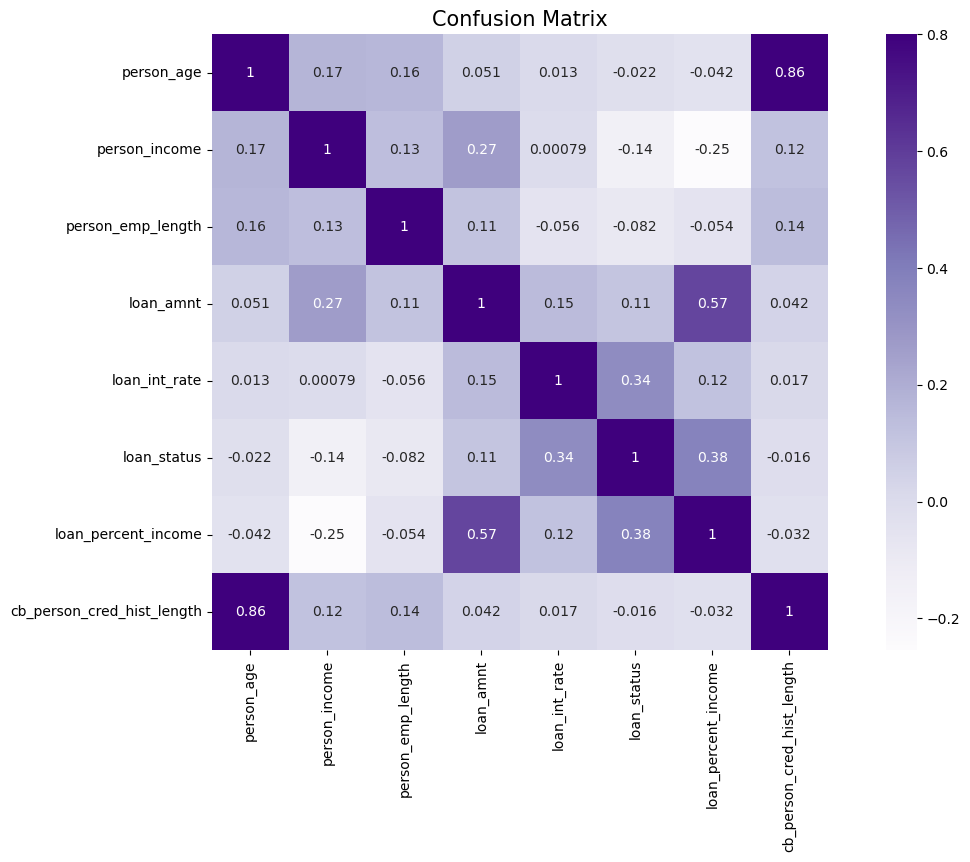

In [66]:
fig, ax = plt.subplots() 
fig.set_size_inches(15,8)
sns.heatmap(data_corr.corr(), vmax =.8, square = True, annot = True,cmap='Purples' )
plt.title('Confusion Matrix',fontsize=15);


In [67]:
sns.set_palette("bright")

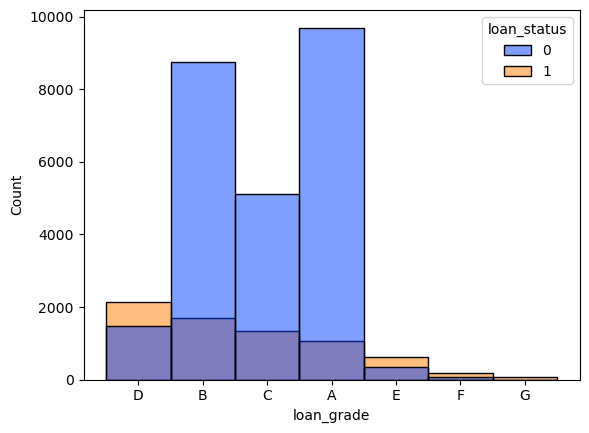

In [11]:
sns.histplot(data=data, x="loan_grade",hue="loan_status",bins=50)
plt.show()

In [68]:
data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [69]:
data.dropna(axis=0, inplace=True)

In [70]:
data.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [71]:
data.loan_status.value_counts()

loan_status
0    22435
1     6203
Name: count, dtype: int64

In [72]:
data = data.drop(data[data['person_age'] > 80].index, axis=0)

In [73]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28633.000000,2.863300e+04,28633.00000,28633.000000,28633.000000,28633.000000,28633.000000,28633.000000
mean,27.709741,6.642964e+04,4.78867,9656.565851,11.039841,0.216638,0.169503,5.792757
std,6.163130,5.155164e+04,4.15470,6329.755492,3.229529,0.411961,0.106389,4.035676
min,20.000000,4.000000e+03,0.00000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.945600e+04,2.00000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.590000e+04,4.00000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.00000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,80.000000,2.039784e+06,123.00000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [74]:
data = data.drop(data[data['person_emp_length'] > 60].index, axis=0)

In [75]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28631.000000,2.863100e+04,28631.000000,28631.000000,28631.000000,28631.000000,28631.000000,28631.000000
mean,27.710174,6.642551e+04,4.780413,9655.319409,11.039825,0.216618,0.169491,5.792917
std,6.163125,5.154808e+04,4.035653,6327.908887,3.229398,0.411948,0.106362,4.035769
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.945600e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.590000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,80.000000,2.039784e+06,41.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [76]:
data['age_group'] = pd.cut(data['person_age'],
                           bins=[20, 26, 36, 46, 56, 66],
                           labels=['20-25', '26-35', '36-45', '46-55', '56-65'])

In [77]:
data['age_group'].value_counts()

age_group
20-25    15666
26-35    10422
36-45     2054
46-55      372
56-65       87
Name: count, dtype: int64

In [78]:
data['income_group'] = pd.cut(data['person_income'],
                              bins=[0, 25000, 50000, 75000, 100000, float('inf')],
                              labels=['low', 'low-middle', 'middle', 'high-middle', 'high'])

In [79]:
data['income_group'].value_counts()

income_group
low-middle     10198
middle          8531
high-middle     4197
high            3733
low             1972
Name: count, dtype: int64

In [80]:
data['loan_amount_group'] = pd.cut(data['loan_amnt'],
                                   bins=[0, 5000, 10000, 15000, float('inf')],
                                   labels=['small', 'medium', 'large', 'very large'])

In [81]:
data['loan_amount_group'].value_counts()

loan_amount_group
medium        10608
small          8182
large          5430
very large     4411
Name: count, dtype: int64

In [82]:
data['loan_percent_income_group'] = pd.cut(data['loan_percent_income'],
                              bins=[0, 0.1, 0.15, 0.20, 0.25, float('inf')],
                              labels=['low', 'low-middle', 'middle', 'high-middle', 'high'])

In [83]:
data['loan_percent_income_group'].value_counts()

loan_percent_income_group
low            9256
low-middle     5935
high           5433
middle         4687
high-middle    3313
Name: count, dtype: int64

In [84]:
data['person_emp_length'].unique()

array([ 5.,  1.,  4.,  8.,  2.,  6.,  7.,  0.,  9.,  3., 10., 11., 18.,
       12., 17., 14., 16., 13., 19., 15., 22., 20., 21., 24., 23., 26.,
       25., 27., 31., 28., 41., 34., 29., 38., 30.])

In [85]:
data['person_emp_length_group'] = pd.cut(data['person_emp_length'],
                              bins=[0, 5, 8, 10, float('inf')],
                              labels=['short', 'middle','stable', 'long'])

In [86]:
data['person_emp_length_group'].value_counts()

person_emp_length_group
short     14528
middle     5899
long       2638
stable     1858
Name: count, dtype: int64

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,age_group,income_group,loan_amount_group,loan_percent_income_group,person_emp_length_group
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,20-25,low,small,low,short
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,20-25,low,medium,high,short
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,20-25,middle,very large,high,short
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,20-25,middle,very large,high,middle
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,20-25,low,small,high-middle,short
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30,56-65,middle,medium,low-middle,short
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19,46-55,high,very large,low-middle,short
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28,56-65,high-middle,very large,high,short
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26,46-55,high,large,low,short


In [89]:
temp = data[['age_group','income_group','loan_amount_group','loan_percent_income_group','person_home_ownership','person_emp_length_group','loan_status']].to_numpy()
temp

array([['20-25', 'low', 'small', ..., 'OWN', 'short', 0],
       ['20-25', 'low', 'medium', ..., 'MORTGAGE', 'short', 1],
       ['20-25', 'middle', 'very large', ..., 'RENT', 'short', 1],
       ...,
       ['56-65', 'high-middle', 'very large', ..., 'RENT', 'short', 1],
       ['46-55', 'high', 'large', ..., 'MORTGAGE', 'short', 0],
       ['56-65', 'low-middle', 'medium', ..., 'RENT', 'short', 0]],
      dtype=object)

In [90]:
x = data[['age_group','income_group','loan_amount_group','loan_percent_income_group','loan_intent','person_home_ownership','person_emp_length_group']].to_numpy()
x

array([['20-25', 'low', 'small', ..., 'EDUCATION', 'OWN', 'short'],
       ['20-25', 'low', 'medium', ..., 'MEDICAL', 'MORTGAGE', 'short'],
       ['20-25', 'middle', 'very large', ..., 'MEDICAL', 'RENT', 'short'],
       ...,
       ['56-65', 'high-middle', 'very large', ..., 'HOMEIMPROVEMENT',
        'RENT', 'short'],
       ['46-55', 'high', 'large', ..., 'PERSONAL', 'MORTGAGE', 'short'],
       ['56-65', 'low-middle', 'medium', ..., 'MEDICAL', 'RENT', 'short']],
      dtype=object)

In [91]:
y = data.iloc[:,8].values
y

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [92]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder_x = LabelEncoder()

In [39]:
for i in range(0, 6):
    x[:,i] = LabelEncoder_x.fit_transform(x[:,i])
    x[:,6] = LabelEncoder_x.fit_transform(x[:,6])

x  

array([[0, 2, 2, ..., 1, 2, 2],
       [0, 2, 1, ..., 3, 0, 2],
       [0, 4, 3, ..., 3, 3, 2],
       ...,
       [4, 1, 3, ..., 2, 3, 2],
       [3, 0, 0, ..., 4, 0, 2],
       [4, 3, 1, ..., 3, 3, 2]], dtype=object)

In [40]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks()
X_tl, y_tl = tl.fit_resample(x, y)

array([[0., 2., 2., ..., 1., 2., 2.],
       [0., 2., 1., ..., 3., 0., 2.],
       [0., 4., 3., ..., 3., 3., 2.],
       ...,
       [4., 1., 3., ..., 2., 3., 2.],
       [3., 0., 0., ..., 4., 0., 2.],
       [4., 3., 1., ..., 3., 3., 2.]])

In [93]:
test_size = 0.2;
x_train, x_test, y_train,  y_test = train_test_split(x, y, test_size = test_size, random_state=0)

from sklearn.preprocessing import LabelEncoder
LabelEncoder_x = LabelEncoder()

In [94]:
print(x_train.shape, x_test.shape)

(22904, 7) (5727, 7)


In [95]:
x_train

array([['26-35', 'high', 'small', ..., 'PERSONAL', 'RENT', 'short'],
       ['26-35', 'low-middle', 'large', ..., 'DEBTCONSOLIDATION', 'RENT',
        'short'],
       ['20-25', 'low', 'medium', ..., 'PERSONAL', 'MORTGAGE', 'middle'],
       ...,
       ['20-25', 'middle', 'medium', ..., 'VENTURE', 'RENT', 'middle'],
       ['20-25', 'low-middle', 'large', ..., 'DEBTCONSOLIDATION', 'RENT',
        'short'],
       ['20-25', 'low-middle', 'very large', ..., 'PERSONAL', 'MORTGAGE',
        'middle']], dtype=object)

In [96]:
x_train = x_train.astype('str')
x_train

array([['26-35', 'high', 'small', ..., 'PERSONAL', 'RENT', 'short'],
       ['26-35', 'low-middle', 'large', ..., 'DEBTCONSOLIDATION', 'RENT',
        'short'],
       ['20-25', 'low', 'medium', ..., 'PERSONAL', 'MORTGAGE', 'middle'],
       ...,
       ['20-25', 'middle', 'medium', ..., 'VENTURE', 'RENT', 'middle'],
       ['20-25', 'low-middle', 'large', ..., 'DEBTCONSOLIDATION', 'RENT',
        'short'],
       ['20-25', 'low-middle', 'very large', ..., 'PERSONAL', 'MORTGAGE',
        'middle']], dtype='<U17')

In [97]:
for i in range(0, 6):
    x_train[:,i] = LabelEncoder_x.fit_transform(x_train[:,i])
    x_train[:,6] = LabelEncoder_x.fit_transform(x_train[:,6])

x_train   

array([['1', '0', '2', ..., '4', '3', '3'],
       ['1', '3', '0', ..., '0', '3', '3'],
       ['0', '2', '1', ..., '4', '0', '1'],
       ...,
       ['0', '4', '1', ..., '5', '3', '1'],
       ['0', '3', '0', ..., '0', '3', '3'],
       ['0', '3', '3', ..., '4', '0', '1']], dtype='<U17')

In [98]:
LabelEncoder_y = LabelEncoder()
y_train = LabelEncoder_y.fit_transform(y_train)

y_train

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [99]:
x_test = x_test.astype('str')
x_test

array([['20-25', 'middle', 'very large', ..., 'MEDICAL', 'RENT',
        'stable'],
       ['20-25', 'middle', 'medium', ..., 'EDUCATION', 'RENT', 'nan'],
       ['20-25', 'middle', 'medium', ..., 'EDUCATION', 'RENT', 'short'],
       ...,
       ['20-25', 'high-middle', 'small', ..., 'VENTURE', 'MORTGAGE',
        'middle'],
       ['26-35', 'low-middle', 'large', ..., 'DEBTCONSOLIDATION',
        'MORTGAGE', 'middle'],
       ['26-35', 'low-middle', 'small', ..., 'VENTURE', 'OWN', 'short']],
      dtype='<U17')

In [100]:
for i in range(0, 6):
    x_test[:,i] = LabelEncoder_x.fit_transform(x_test[:,i])
    x_test[:,6] = LabelEncoder_x.fit_transform(x_test[:,6])

x_test

array([['0', '4', '3', ..., '3', '3', '4'],
       ['0', '4', '1', ..., '1', '3', '2'],
       ['0', '4', '1', ..., '1', '3', '3'],
       ...,
       ['0', '1', '2', ..., '5', '0', '1'],
       ['1', '3', '0', ..., '0', '0', '1'],
       ['1', '3', '2', ..., '5', '2', '3']], dtype='<U17')

In [101]:
LabelEncoder_y = LabelEncoder()
y_test = LabelEncoder_y.fit_transform(y_test)

y_test

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [102]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
x_train_scaled = ss.fit_transform(x_train)
x_test_scaled = ss.fit_transform(x_test)

In [103]:
x_train

array([['1', '0', '2', ..., '4', '3', '3'],
       ['1', '3', '0', ..., '0', '3', '3'],
       ['0', '2', '1', ..., '4', '0', '1'],
       ...,
       ['0', '4', '1', ..., '5', '3', '1'],
       ['0', '3', '0', ..., '0', '3', '3'],
       ['0', '3', '3', ..., '4', '0', '1']], dtype='<U17')

In [104]:
from catboost import CatBoostClassifier


In [105]:
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.metrics import mean_squared_error as MSE
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import time as t
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.metrics import make_scorer, f1_score

In [106]:
cat = CatBoostClassifier(verbose=0) 


In [50]:
# RandomizedSearchCV hyperparameter tuning
model_cat = CatBoostClassifier(loss_function='Logloss', random_state=42)

param_dist = {
    'iterations': [200, 500, 1000],
    'learning_rate': [0.001, 0.01, 0.1],
    'depth': [3, 6, 9]
}

scorer = make_scorer(f1_score, average='weighted')

random_search = RandomizedSearchCV(model_cat, param_distributions=param_dist, n_iter=10, cv=5, scoring=scorer, n_jobs=-1, random_state=42)

random_search.fit(x_train, y_train)

print("(CatBoost Model)Random Search - Best Hyperparameters:", random_search.best_params_)




KeyboardInterrupt: 

In [50]:
catboost = random_search.best_estimator_
y_pred_random = catboost.predict(x_test)
 
# Print classification report for the Random Search model
print("Random Search - Classification Report:")
print(classification_report(y_test, y_pred_random))

NameError: name 'random_search' is not defined

In [51]:
catboost.get_params()

{'iterations': 1000,
 'learning_rate': 0.1,
 'depth': 3,
 'loss_function': 'Logloss',
 'random_state': 42}

In [52]:
print(f"The Accuracy of the CatBoost Model: {round(metrics.accuracy_score(y_pred_random, y_test), 3)}")


The Accuracy of the CatBoost Model: 0.848


In [107]:
model_cat = CatBoostClassifier(iterations= 1000,
  learning_rate = 0.1,
  depth = 3,
  random_state = 42)


In [108]:
model_cat.fit(x_train,y_train)

0:	learn: 0.6364425	total: 4ms	remaining: 4s
1:	learn: 0.5914903	total: 7.24ms	remaining: 3.61s
2:	learn: 0.5562590	total: 9.82ms	remaining: 3.27s
3:	learn: 0.5287836	total: 13ms	remaining: 3.23s
4:	learn: 0.5077405	total: 15.9ms	remaining: 3.16s
5:	learn: 0.4914274	total: 18.5ms	remaining: 3.06s
6:	learn: 0.4783182	total: 21.1ms	remaining: 3s
7:	learn: 0.4684281	total: 24.1ms	remaining: 2.99s
8:	learn: 0.4604330	total: 26.9ms	remaining: 2.97s
9:	learn: 0.4528997	total: 30.2ms	remaining: 2.98s
10:	learn: 0.4471450	total: 33.2ms	remaining: 2.99s
11:	learn: 0.4415941	total: 35.7ms	remaining: 2.94s
12:	learn: 0.4372561	total: 38.2ms	remaining: 2.9s
13:	learn: 0.4341853	total: 41.2ms	remaining: 2.9s
14:	learn: 0.4312058	total: 44.3ms	remaining: 2.91s
15:	learn: 0.4288147	total: 47.2ms	remaining: 2.9s
16:	learn: 0.4269076	total: 49.8ms	remaining: 2.88s
17:	learn: 0.4253129	total: 52.9ms	remaining: 2.89s
18:	learn: 0.4236828	total: 55.7ms	remaining: 2.87s
19:	learn: 0.4223899	total: 58.3ms	r

197:	learn: 0.3891341	total: 595ms	remaining: 2.41s
198:	learn: 0.3891058	total: 599ms	remaining: 2.41s
199:	learn: 0.3890776	total: 603ms	remaining: 2.41s
200:	learn: 0.3889994	total: 606ms	remaining: 2.41s
201:	learn: 0.3889611	total: 610ms	remaining: 2.41s
202:	learn: 0.3888977	total: 613ms	remaining: 2.41s
203:	learn: 0.3888626	total: 617ms	remaining: 2.4s
204:	learn: 0.3888401	total: 621ms	remaining: 2.41s
205:	learn: 0.3888046	total: 624ms	remaining: 2.4s
206:	learn: 0.3887704	total: 627ms	remaining: 2.4s
207:	learn: 0.3886820	total: 630ms	remaining: 2.4s
208:	learn: 0.3886349	total: 633ms	remaining: 2.39s
209:	learn: 0.3886200	total: 636ms	remaining: 2.39s
210:	learn: 0.3885784	total: 639ms	remaining: 2.39s
211:	learn: 0.3883324	total: 642ms	remaining: 2.39s
212:	learn: 0.3882908	total: 645ms	remaining: 2.38s
213:	learn: 0.3882537	total: 647ms	remaining: 2.38s
214:	learn: 0.3882139	total: 650ms	remaining: 2.37s
215:	learn: 0.3881713	total: 652ms	remaining: 2.37s
216:	learn: 0.38

391:	learn: 0.3824590	total: 1.21s	remaining: 1.87s
392:	learn: 0.3824360	total: 1.21s	remaining: 1.87s
393:	learn: 0.3824208	total: 1.21s	remaining: 1.87s
394:	learn: 0.3824064	total: 1.22s	remaining: 1.86s
395:	learn: 0.3823780	total: 1.22s	remaining: 1.86s
396:	learn: 0.3823503	total: 1.22s	remaining: 1.86s
397:	learn: 0.3823458	total: 1.23s	remaining: 1.86s
398:	learn: 0.3823084	total: 1.23s	remaining: 1.85s
399:	learn: 0.3823033	total: 1.23s	remaining: 1.85s
400:	learn: 0.3822755	total: 1.24s	remaining: 1.85s
401:	learn: 0.3822666	total: 1.24s	remaining: 1.85s
402:	learn: 0.3822525	total: 1.24s	remaining: 1.84s
403:	learn: 0.3822079	total: 1.25s	remaining: 1.84s
404:	learn: 0.3821956	total: 1.25s	remaining: 1.83s
405:	learn: 0.3821667	total: 1.25s	remaining: 1.83s
406:	learn: 0.3821565	total: 1.25s	remaining: 1.83s
407:	learn: 0.3821415	total: 1.26s	remaining: 1.82s
408:	learn: 0.3821274	total: 1.26s	remaining: 1.82s
409:	learn: 0.3820732	total: 1.26s	remaining: 1.82s
410:	learn: 

598:	learn: 0.3790517	total: 1.83s	remaining: 1.22s
599:	learn: 0.3790501	total: 1.83s	remaining: 1.22s
600:	learn: 0.3790286	total: 1.84s	remaining: 1.22s
601:	learn: 0.3790216	total: 1.84s	remaining: 1.22s
602:	learn: 0.3790015	total: 1.84s	remaining: 1.21s
603:	learn: 0.3789851	total: 1.85s	remaining: 1.21s
604:	learn: 0.3789702	total: 1.85s	remaining: 1.21s
605:	learn: 0.3789544	total: 1.85s	remaining: 1.21s
606:	learn: 0.3788972	total: 1.86s	remaining: 1.2s
607:	learn: 0.3788809	total: 1.86s	remaining: 1.2s
608:	learn: 0.3788663	total: 1.86s	remaining: 1.2s
609:	learn: 0.3788571	total: 1.87s	remaining: 1.19s
610:	learn: 0.3788491	total: 1.87s	remaining: 1.19s
611:	learn: 0.3788402	total: 1.87s	remaining: 1.19s
612:	learn: 0.3788304	total: 1.88s	remaining: 1.18s
613:	learn: 0.3788181	total: 1.88s	remaining: 1.18s
614:	learn: 0.3788065	total: 1.88s	remaining: 1.18s
615:	learn: 0.3787960	total: 1.88s	remaining: 1.17s
616:	learn: 0.3787897	total: 1.89s	remaining: 1.17s
617:	learn: 0.3

792:	learn: 0.3767159	total: 2.43s	remaining: 635ms
793:	learn: 0.3767079	total: 2.44s	remaining: 632ms
794:	learn: 0.3766976	total: 2.44s	remaining: 630ms
795:	learn: 0.3766893	total: 2.44s	remaining: 627ms
796:	learn: 0.3766816	total: 2.45s	remaining: 625ms
797:	learn: 0.3766625	total: 2.46s	remaining: 622ms
798:	learn: 0.3766598	total: 2.46s	remaining: 620ms
799:	learn: 0.3766466	total: 2.47s	remaining: 617ms
800:	learn: 0.3766392	total: 2.47s	remaining: 614ms
801:	learn: 0.3766293	total: 2.47s	remaining: 611ms
802:	learn: 0.3766093	total: 2.48s	remaining: 608ms
803:	learn: 0.3766014	total: 2.48s	remaining: 605ms
804:	learn: 0.3765871	total: 2.48s	remaining: 602ms
805:	learn: 0.3765775	total: 2.49s	remaining: 599ms
806:	learn: 0.3765692	total: 2.49s	remaining: 595ms
807:	learn: 0.3765611	total: 2.49s	remaining: 592ms
808:	learn: 0.3765532	total: 2.49s	remaining: 589ms
809:	learn: 0.3765435	total: 2.5s	remaining: 586ms
810:	learn: 0.3765397	total: 2.5s	remaining: 583ms
811:	learn: 0.

988:	learn: 0.3748939	total: 3.04s	remaining: 33.8ms
989:	learn: 0.3748715	total: 3.04s	remaining: 30.8ms
990:	learn: 0.3748702	total: 3.05s	remaining: 27.7ms
991:	learn: 0.3748666	total: 3.05s	remaining: 24.6ms
992:	learn: 0.3748562	total: 3.06s	remaining: 21.5ms
993:	learn: 0.3748493	total: 3.06s	remaining: 18.5ms
994:	learn: 0.3748384	total: 3.06s	remaining: 15.4ms
995:	learn: 0.3748292	total: 3.06s	remaining: 12.3ms
996:	learn: 0.3748247	total: 3.07s	remaining: 9.23ms
997:	learn: 0.3748143	total: 3.07s	remaining: 6.16ms
998:	learn: 0.3748081	total: 3.08s	remaining: 3.08ms
999:	learn: 0.3747999	total: 3.08s	remaining: 0us


In [109]:
cat.fit(x_train,y_train)


In [110]:
y_pred_cat = model_cat.predict(x_test)
print("The Accuracy of the CatBoost+ Model: ", round(metrics.accuracy_score(y_pred_cat, y_test), 3))

The Accuracy of the CatBoost+ Model:  0.853


In [111]:
y_pred = model_cat.predict(x_test)
print("The Accuracy of the CatBoost Model: ", round(metrics.accuracy_score(y_pred, y_test), 3))

The Accuracy of the CatBoost Model:  0.853


In [112]:
print(model_cat.predict(['0.60797067', '1.8360737', '0.62004711', '0.02588269', '0.84577852', '0.91862894','0.66558736']))

1


In [113]:
print(model_cat.predict([1,0, 1, 2, 4, 0,1]))

0


In [114]:
print(model_cat.predict([1, 4, 2, 2, 3, 1,3]))

0


In [58]:
print(cat.predict([1, 4, 2, 2, 3, 1]))

CatBoostError: There is no trained model to use predict(). Use fit() to train model. Then use this method.

In [169]:
for i in range(10):
 print(x_train[i], y_train[i])

['1' '0' '2' '2' '4' '3' '3'] 0
['1' '3' '0' '0' '0' '3' '3'] 1
['0' '2' '1' '0' '4' '0' '1'] 0
['1' '4' '2' '2' '4' '3' '2'] 0
['1' '2' '2' '2' '5' '3' '3'] 0
['1' '1' '0' '3' '1' '0' '3'] 0
['0' '4' '2' '2' '1' '3' '1'] 0
['0' '1' '3' '0' '0' '3' '3'] 1
['0' '0' '3' '2' '2' '0' '4'] 0
['0' '0' '3' '4' '0' '3' '1'] 0


In [177]:
temp

array([['20-25', 'low', 'small', ..., 'OWN', 'short', 0],
       ['20-25', 'low', 'medium', ..., 'MORTGAGE', 'short', 1],
       ['20-25', 'middle', 'very large', ..., 'RENT', 'short', 1],
       ...,
       ['56-65', 'high-middle', 'very large', ..., 'RENT', 'short', 1],
       ['46-55', 'high', 'large', ..., 'MORTGAGE', 'short', 0],
       ['56-65', 'low-middle', 'medium', ..., 'RENT', 'short', 0]],
      dtype=object)

In [182]:
print("CatBoost Prediction:", model_cat.predict([0, 0, 3, 2,2 , 3, 4]))

CatBoost Prediction: 0


In [115]:
x=np.array(['1' ,'3', '0', '0', '0', '3', '3'])
x=x.reshape(1,-1)
result= model_cat.predict(x)
if result==1:
  print("NO")
else:
  print("Yes")

NO


In [116]:
x=np.array(['0', '2', '1', '0', '4', '0', '1'])
x=x.reshape(1,-1)
result= model_cat.predict(x)
if result==1:
  print("NO")
else:
  print("Yes")

Yes


In [154]:
x=np.array([0, 3, 0, 0, 3, 3,3])
x=x.reshape(1,-1)
result= model_cat.predict(x)
if result==1:
  print("Regect")
else:
  print("Accept")

Regect


In [61]:
x=np.array([1,1, 4, 0, 3, 0,1])
x=x.reshape(1,-1)
result= model_cat.predict(x)
if result==1:
  print("Regect")
else:
  print("Accept")

Accept


In [68]:
x=np.array([1, 0, 4, 0, 0, 3,3])
x=x.reshape(1,-1)
result= model_cat.predict(x)
if result==1:
  print("Regect")
else:
  print("Accept")

Regect


(22904,)

In [166]:
x_test

array([['0', '4', '3', ..., '3', '3', '4'],
       ['0', '4', '1', ..., '1', '3', '2'],
       ['0', '4', '1', ..., '1', '3', '3'],
       ...,
       ['0', '1', '2', ..., '5', '0', '1'],
       ['1', '3', '0', ..., '0', '0', '1'],
       ['1', '3', '2', ..., '5', '2', '3']], dtype='<U17')

In [62]:
temp

array([['20-25', 'low', 'small', ..., 'OWN', 'short', 0],
       ['20-25', 'low', 'medium', ..., 'MORTGAGE', 'short', 1],
       ['20-25', 'middle', 'very large', ..., 'RENT', 'short', 1],
       ...,
       ['56-65', 'high-middle', 'very large', ..., 'RENT', 'short', 1],
       ['46-55', 'high', 'large', ..., 'MORTGAGE', 'short', 0],
       ['56-65', 'low-middle', 'medium', ..., 'RENT', 'short', 0]],
      dtype=object)

In [117]:
import pickle

In [119]:
with open("catboost_model.pkl","wb") as file:
    pickle.dump(cat, file)

In [117]:
from joblib import dump

In [118]:
dump(model_cat, 'Cat_model.joblib')

['Cat_model.joblib']

In [59]:
for column in data.columns:
    print(column)

person_age
person_income
person_home_ownership
person_emp_length
loan_intent
loan_grade
loan_amnt
loan_int_rate
loan_status
loan_percent_income
cb_person_default_on_file
cb_person_cred_hist_length
age_group
income_group
loan_amount_group
loan_percent_income_group
person_emp_length_group
